Connected to base (Python 3.11.7)

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df_fake=pd.read_csv("fake.csv")
df_true=pd.read_csv("true.csv")
df_fake['label'] = 0
df_true['label'] = 1
df=pd.concat([df_fake, df_true], ignore_index=True)

In [ ]:
df.head(15)

                                                title  ... label
0    Donald Trump Sends Out Embarrassing New Year’...  ...     0
1    Drunk Bragging Trump Staffer Started Russian ...  ...     0
2    Sheriff David Clarke Becomes An Internet Joke...  ...     0
3    Trump Is So Obsessed He Even Has Obama’s Name...  ...     0
4    Pope Francis Just Called Out Donald Trump Dur...  ...     0
5    Racist Alabama Cops Brutalize Black Boy While...  ...     0
6    Fresh Off The Golf Course, Trump Lashes Out A...  ...     0
7    Trump Said Some INSANELY Racist Stuff Inside ...  ...     0
8    Former CIA Director Slams Trump Over UN Bully...  ...     0
9    WATCH: Brand-New Pro-Trump Ad Features So Muc...  ...     0
10   Papa John’s Founder Retires, Figures Out Raci...  ...     0
11   WATCH: Paul Ryan Just Told Us He Doesn’t Care...  ...     0
12   Bad News For Trump — Mitch McConnell Says No ...  ...     0
13   WATCH: Lindsey Graham Trashes Media For Portr...  ...     0
14   Heiress To Disney Em

In [ ]:
df=df.drop("title", axis=1)
df=df.drop("subject", axis=1)
df=df.drop("date", axis=1)


In [ ]:
df.head(10)

                                                text  label
0  Donald Trump just couldn t wish all Americans ...      0
1  House Intelligence Committee Chairman Devin Nu...      0
2  On Friday, it was revealed that former Milwauk...      0
3  On Christmas day, Donald Trump announced that ...      0
4  Pope Francis used his annual Christmas Day mes...      0
5  The number of cases of cops brutalizing and ki...      0
6  Donald Trump spent a good portion of his day a...      0
7  In the wake of yet another court decision that...      0
8  Many people have raised the alarm regarding th...      0
9  Just when you might have thought we d get a br...      0


In [ ]:
df.shape

(44898, 2)


In [ ]:
df.isna().sum()

text     0
label    0
dtype: int64


In [ ]:
import seaborn as sb

<Axes: xlabel='label', ylabel='count'>

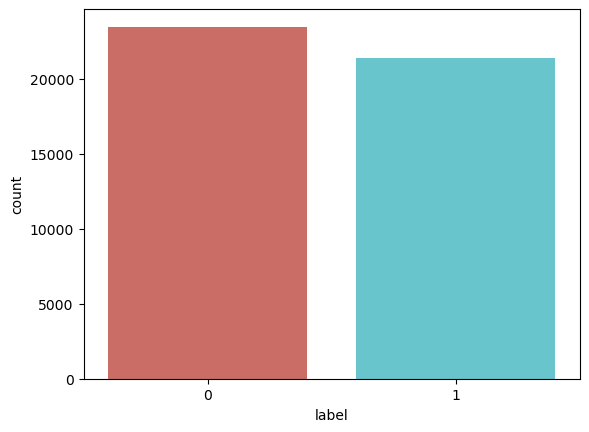

In [ ]:
def create_plot(datafile):
    return sb.countplot(x='label', data=datafile, palette="hls")
create_plot(df)

In [ ]:
def data_quality():
    df.isnull().sum()
    df.info()
data_quality()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9874164810690423


In [ ]:
news_text = "Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the  peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because of growing tensions between Israelis and Palestinians,  Francis said.  On this festive day, let us ask the Lord for peace for Jerusalem and for all the Holy Land. Let us pray that the will to resume dialogue may prevail between the parties and that a negotiated solution can finally be reached. The Pope went on to plead for acceptance of refugees who have been forced from their homes, and that is an issue Trump continues to fight against. Francis used Jesus for which there was  no place in the inn  as an analogy. Today, as the winds of war are blowing in our world and an outdated model of development continues to produce human, societal and environmental decline, Christmas invites us to focus on the sign of the Child and to recognize him in the faces of little children, especially those for whom, like Jesus,  there is no place in the inn,  he said. Jesus knows well the pain of not being welcomed and how hard it is not to have a place to lay one s head,  he added.  May our hearts not be closed as they were in the homes of Bethlehem. The Pope said that Mary and Joseph were immigrants who struggled to find a safe place to stay in Bethlehem. They had to leave their people, their home, and their land,  Francis said.  This was no comfortable or easy journey for a young couple about to have a child.   At heart, they were full of hope and expectation because of the child about to be born; yet their steps were weighed down by the uncertainties and dangers that attend those who have to leave their home behind. So many other footsteps are hidden in the footsteps of Joseph and Mary,  Francis said Sunday. We see the tracks of entire families forced to set out in our own day. We see the tracks of millions of persons who do not choose to go away, but driven from their land, leave behind their dear ones. Amen to that.Photo by Christopher Furlong/Getty Images."
vectorized_text = vectorizer.transform([news_text])
prediction = model.predict(vectorized_text)

print("Prediction:", "Fake News" if prediction[0] == 1 else "Real News")

Prediction: Real News


In [ ]:
news_text = "Abigail Disney is an heiress with brass ovaries who will profit from the GOP tax scam bill but isn t into f-cking poor people over. Ms. Disney penned an op-ed for USA Today in which she rips the GOP a new one because she has  always been cognizant of income and wealth inequality.  In other words, she is not Donald Trump, Paul Ryan or Bob Corker. Or Mitch McConnell. She is Abigail Disney, dammit. Since the election of Ronald Reagan, the gap between rich and poor has grown dramatically and  trickle down  economics has turned out to cause more of a trickle up,  she writes.  But nothing has brought the problem of inequality into sharper focus for me than the current proposals by Republicans to overhaul the tax system. Disney says that this proposal will be burdensome to the middle class while decreasing  the responsibility of the wealthy to contribute to the common good. And then she dropped a truth bomb. (We like truth bombs.)Republicans insist this plan will cut taxes for the middle class, but the truth is that any meager savings will be offset by losses elsewhere   in deductions no longer allowed, loss of Medicaid and Medicare coverage, and less funding for education, all of which are on the chopping block in order to provide a tax cut for a few very wealthy people like me. There is even a tax break to private jet owners. This bill will give me this tax cut while also killing health insurance for over 13 million people,  Disney wrote.  It will let me pass over $20 million to my children, tax-free. And all my friends with private jets? They get a tax cut too. With a suffocating education system, a dying infrastructure and a national debt that will be at least $1.5 trillion bigger, that social mobility will be far out of reach for people like you,  Disney continued.  But I will be able to stay comfortably right where I am. Does that strike you as fair? No, it does not, thankyouverymuch. But given how this bill was written, I think it s looking a lot like a nightmare from Pirates of the Caribbean,  Disney wrote.  Have I made you angry yet? I really hope I ve made you angry. You should be. No one who votes for this tax bill will be voting with your life in mind. But you will pay for it. Watch:This Disney heiress is taking a stand against the GOP tax bill  even though she s going to benefit from it pic.twitter.com/E5bmcI83mU  NowThis (@nowthisnews) December 20, 2017 If democracy is just a bunch of people advocating for their own self-interest instead of the interests of the greater good, then we re not a democracy, we re anarchy,  Disney added.  We need to start voting and acting as citizens as though the common good matters more than our own personal well-being. This isn t tax reform. It s a heist.Photo by Ralph Orlowski/Getty Images for Burda Media."
vectorized_text = vectorizer.transform([news_text])
prediction = model.predict(vectorized_text)

print("Prediction:", "Fake News" if prediction[0] == 1 else "Real News")

Prediction: Real News


In [ ]:
news_text = "WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumpâ€™s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrationâ€™s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. â€œThe Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODâ€™s study and will continue to defend the presidentâ€™s lawful authority in District Court in the meantime,â€ the official said, speaking on condition of anonymity. In September, the Pentagon said it had created a panel of senior officials to study how to implement a directive by Trump to prohibit transgender individuals from serving. The Defense Department has until Feb. 21 to submit a plan to Trump. Lawyers representing currently-serving transgender service members and aspiring recruits said they had expected the administration to appeal the rulings to the conservative-majority Supreme Court, but were hoping that would not happen. Pentagon spokeswoman Heather Babb said in a statement: â€œAs mandated by court order, the Department of Defense is prepared to begin accessing transgender applicants for military service Jan. 1. All applicants must meet all accession standards.â€ Jennifer Levi, a lawyer with gay, lesbian and transgender advocacy group GLAD, called the decision not to appeal â€œgreat news.â€ â€œIâ€™m hoping it means the government has come to see that there is no way to justify a ban and that itâ€™s not good for the military or our country,â€ Levi said. Both GLAD and the American Civil Liberties Union represent plaintiffs in the lawsuits filed against the administration. In a move that appealed to his hard-line conservative supporters, Trump announced in July that he would prohibit transgender people from serving in the military, reversing Democratic President Barack Obamaâ€™s policy of accepting them. Trump said on Twitter at the time that the military â€œcannot be burdened with the tremendous medical costs and disruption that transgender in the military would entail.â€ Four federal judges - in Baltimore, Washington, D.C., Seattle and Riverside, California - have issued rulings blocking Trumpâ€™s ban while legal challenges to the Republican presidentâ€™s policy proceed. The judges said the ban would likely violate the right under the U.S. Constitution to equal protection under the law. The Pentagon on Dec. 8 issued guidelines to recruitment personnel in order to enlist transgender applicants by Jan. 1. The memo outlined medical requirements and specified how the applicantsâ€™ sex would be identified and even which undergarments they would wear. The Trump administration previously said in legal papers that the armed forces were not prepared to train thousands of personnel on the medical standards needed to process transgender applicants and might have to accept â€œsome individuals who are not medically fit for service.â€ The Obama administration had set a deadline of July 1, 2017, to begin accepting transgender recruits. But Trumpâ€™s defense secretary, James Mattis, postponed that date to Jan. 1, 2018, which the presidentâ€™s ban then put off indefinitely. Trump has taken other steps aimed at rolling back transgender rights. In October, his administration said a federal law banning gender-based workplace discrimination does not protect transgender employees, reversing another Obama-era position. In February, Trump rescinded guidance issued by the Obama administration saying that public schools should allow transgender students to use the restroom that corresponds to their gender identity."
vectorized_text = vectorizer.transform([news_text])
prediction = model.predict(vectorized_text)

print("Prediction:", "Fake News" if prediction[0] == 0 else "Real News")

Prediction: Real News
